In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('NLPDATASET.csv')

In [3]:
df1.columns

Index(['Threat', 'Type'], dtype='object')

In [7]:
df1.rename(columns={'Threat':'Threat_Original'}, inplace=True)

In [8]:
df1.head

<bound method NDFrame.head of                                        Threat_Original  Type
0                        looting will lead to shooting     1
1    ‘I’ll show him things he’s never seen before l...     1
2                        We will together gangrape her     1
3    I will make sure you will be raped and murdere...     1
4                               Watch your last breath     1
..                                                 ...   ...
337  I teach her French get to know her dazzle her ...     0
338              He always have that shit-eating grin?     1
339  She just needs time to cool off I'll give it a...     0
340                                always talking shit     1
341  She hates you with the fire of a thousand suns...     0

[342 rows x 2 columns]>

In [9]:
df1.columns

Index(['Threat_Original', 'Type'], dtype='object')

In [10]:
import re
from bs4 import BeautifulSoup

In [11]:
# Remove HTTP tags
%time df1['Threat_Processed'] = df1['Threat_Original'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df1.head()

Wall time: 5.86 ms


,Threat_Original,Type,Threat_Processed
0,looting will lead to shooting,1,looting will lead to shooting
1,‘I’ll show him things he’s never seen before l...,1,I ll show him things he s never seen before li...
2,We will together gangrape her,1,We will together gangrape her
3,I will make sure you will be raped and murdere...,1,I will make sure you will be raped and murdere...
4,Watch your last breath,1,Watch your last breath


In [12]:
#Lower Case
%time df1['Threat_Processed'] = df1['Threat_Processed'].map(lambda x: x.lower())
df1.head()

Wall time: 976 µs


,Threat_Original,Type,Threat_Processed
0,looting will lead to shooting,1,looting will lead to shooting
1,‘I’ll show him things he’s never seen before l...,1,i ll show him things he s never seen before li...
2,We will together gangrape her,1,we will together gangrape her
3,I will make sure you will be raped and murdere...,1,i will make sure you will be raped and murdere...
4,Watch your last breath,1,watch your last breath


In [14]:
#Remove punctuations
%time df1['Threat_Processed'] = df1['Threat_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df1.head()

Wall time: 976 µs


,Threat_Original,Type,Threat_Processed
0,looting will lead to shooting,1,looting will lead to shooting
1,‘I’ll show him things he’s never seen before l...,1,i ll show him things he s never seen before li...
2,We will together gangrape her,1,we will together gangrape her
3,I will make sure you will be raped and murdere...,1,i will make sure you will be raped and murdere...
4,Watch your last breath,1,watch your last breath


In [16]:
#Remove unicodes
%time df1['Threat_Processed'] = df1['Threat_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df1.head()

Wall time: 1.95 ms


,Threat_Original,Type,Threat_Processed
0,looting will lead to shooting,1,looting will lead to shooting
1,‘I’ll show him things he’s never seen before l...,1,i ll show him things he s never seen before li...
2,We will together gangrape her,1,we will together gangrape her
3,I will make sure you will be raped and murdere...,1,i will make sure you will be raped and murdere...
4,Watch your last breath,1,watch your last breath


In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [19]:
# Remove stopwords
stop_words = stopwords.words('english')
%time df1['Threat_Processed'] = df1['Threat_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df1.head()

Wall time: 6.93 ms


,Threat_Original,Type,Threat_Processed
0,looting will lead to shooting,1,looting lead shooting
1,‘I’ll show him things he’s never seen before l...,1,show things never seen like side k slice
2,We will together gangrape her,1,together gangrape
3,I will make sure you will be raped and murdere...,1,make sure raped murdered u bitch commit suicid...
4,Watch your last breath,1,watch last breath


In [21]:
# Lemmatize the text
lemmer = WordNetLemmatizer()

%time df1['Threat_Processed'] = df1['Threat_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df1.head()

Wall time: 1.68 s


,Threat_Original,Type,Threat_Processed
0,looting will lead to shooting,1,looting lead shooting
1,‘I’ll show him things he’s never seen before l...,1,show thing never seen like side k slice
2,We will together gangrape her,1,together gangrape
3,I will make sure you will be raped and murdere...,1,make sure raped murdered u bitch commit suicid...
4,Watch your last breath,1,watch last breath


In [22]:
#Removing Stop words again after Lemmatize
%time df1['Threat_Processed'] = df1['Threat_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df1.head())
display(df1.tail())

Wall time: 4.44 ms


,Threat_Original,Type,Threat_Processed
0,looting will lead to shooting,1,looting lead shooting
1,‘I’ll show him things he’s never seen before l...,1,show thing never seen like side k slice
2,We will together gangrape her,1,together gangrape
3,I will make sure you will be raped and murdere...,1,make sure raped murdered u bitch commit suicid...
4,Watch your last breath,1,watch last breath


,Threat_Original,Type,Threat_Processed
337,I teach her French get to know her dazzle her ...,0,teach french get know dazzle charm fall love
338,He always have that shit-eating grin?,1,always shit eating grin
339,She just needs time to cool off I'll give it a...,0,need time cool give day
340,always talking shit,1,always talking shit
341,She hates you with the fire of a thousand suns...,0,hate fire thousand sun direct quote


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [24]:
#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [26]:
#10 most common and 10 most rare words
common_words = get_n_words(df1['Threat_Processed'], "top", 15)
rare_words = get_n_words(df1['Threat_Processed'], "bottom", 15)

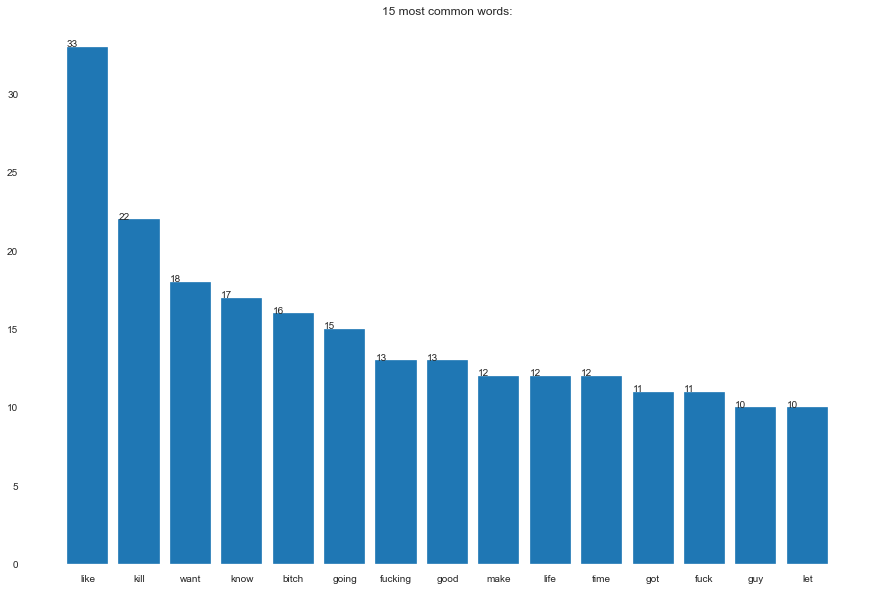

In [28]:
#plotting the ten most common words
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

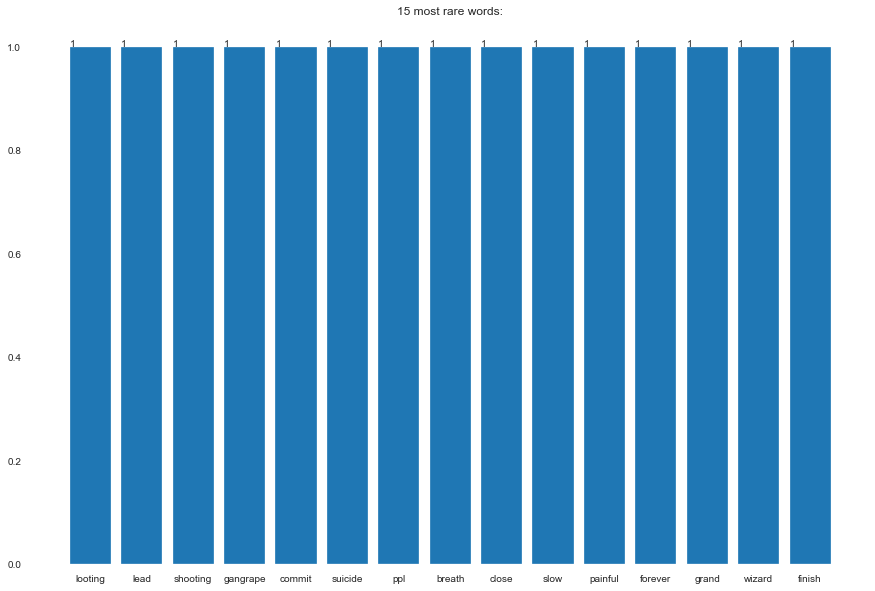

In [29]:
#plotting the ten most rare words
rare_words = dict(rare_words)
names = list(rare_words.keys())
values = list(rare_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_words)),values,tick_label=names)
plt.title('15 most rare words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

In [30]:
# BOW-TF Embedding
no_features = 800
tf_vectorizer = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=[1, 3])

%time tpl_tf = tf_vectorizer.fit_transform(df1['Threat_Processed'])
display("Bow-TF :", tpl_tf.shape)
df_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names())
display(df_tf.head())

Wall time: 21.5 ms


'Bow-TF :'

(342, 53)

,always,another,back,bitch,come,cut,day,death,die,ever,...,shit,someone,something,take,thing,threat,time,want,wish,would
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Preparing processed and BoW-TF embedded data for Classification
df_tf_m = pd.concat([df1, df_tf], axis = 1)
df_tf_m.drop(columns=['Threat_Original', 'Threat_Processed'], inplace = True)
print(df_tf_m.shape)
display(df_tf_m.head())
display(df_tf_m.tail())

(342, 54)


,Type,always,another,back,bitch,come,cut,day,death,die,...,shit,someone,something,take,thing,threat,time,want,wish,would
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Type,always,another,back,bitch,come,cut,day,death,die,...,shit,someone,something,take,thing,threat,time,want,wish,would
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
339,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
340,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# BoW-TF:IDF Embedding
tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=[1,3])

%time tpl_tfidf = tfidf_vectorizer.fit_transform(df1['Threat_Processed'])
display("Bow-TF:IDF :", tpl_tfidf.shape)
df_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=df1.index)
display(df_tfidf.head())

Wall time: 7.81 ms


'Bow-TF:IDF :'

(342, 41)

,always,back,bitch,come,cut,day,death,die,ever,find,...,rape,see,shit,someone,something,take,thing,time,want,would
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.818389,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.576023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [35]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
df_tfidf_m = pd.concat([df1, df_tfidf], axis = 1)
df_tfidf_m.drop(columns=['Threat_Original', 'Threat_Processed'], inplace = True)
print(df_tfidf_m.shape)
display(df_tfidf_m.head())
display(df_tfidf_m.tail())

(342, 42)


,Type,always,back,bitch,come,cut,day,death,die,ever,...,rape,see,shit,someone,something,take,thing,time,want,would
0,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.818389,0.0,0.0,0.0
2,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,1,0.0,0.0,0.576023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


,Type,always,back,bitch,come,cut,day,death,die,ever,...,rape,see,shit,someone,something,take,thing,time,want,would
337,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
338,1,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
339,0,0.000000,0.0,0.0,0.0,0.0,0.597305,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.549973,0.0,0.0
340,1,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
341,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [43]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics

def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['Threat', 'Non-threat'], yticklabels=['Threat', 'Non-threat'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [44]:
#function to prepare different Classification models

def model_dvt(df):
    Y = df['Type']
    X = df.drop('Type', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    
    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (290, 53)
Test Data Dimensions :  (52, 53)

 Random Forest Classifier
Wall time: 541 ms

 Confusion Matrix


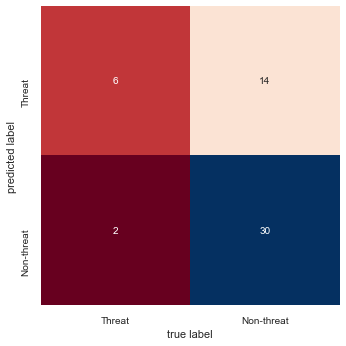


 Classification Report 

              precision    recall  f1-score   support

           0       0.75      0.30      0.43        20
           1       0.68      0.94      0.79        32

    accuracy                           0.69        52
   macro avg       0.72      0.62      0.61        52
weighted avg       0.71      0.69      0.65        52

Overall Accuracy :  69.23
Precision Score :  68.18
Recall Score :  93.75
AUC :  76.95 



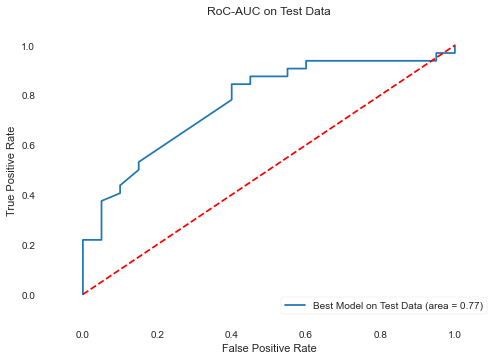

--------------------------------------------------------------------------

 AdaBoost Classifier
Wall time: 249 ms

 Confusion Matrix


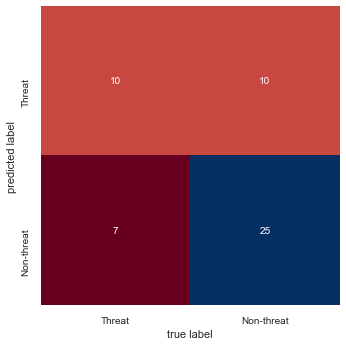


 Classification Report 

              precision    recall  f1-score   support

           0       0.59      0.50      0.54        20
           1       0.71      0.78      0.75        32

    accuracy                           0.67        52
   macro avg       0.65      0.64      0.64        52
weighted avg       0.67      0.67      0.67        52

Overall Accuracy :  67.31
Precision Score :  71.43
Recall Score :  78.12
AUC :  69.3 



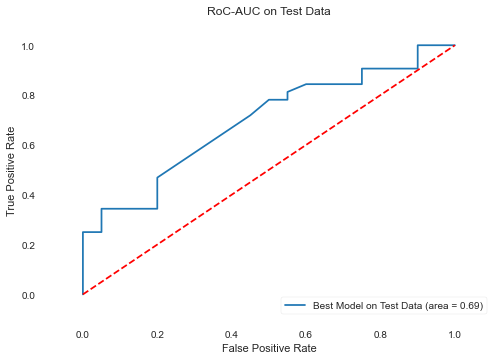

--------------------------------------------------------------------------

 Grdient Boosting Classifier
Wall time: 36.1 ms

 Confusion Matrix


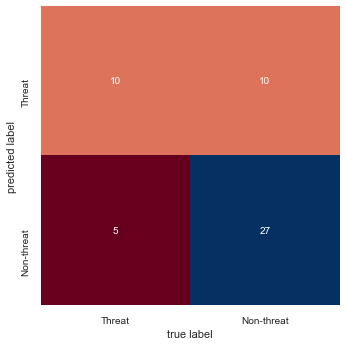


 Classification Report 

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        20
           1       0.73      0.84      0.78        32

    accuracy                           0.71        52
   macro avg       0.70      0.67      0.68        52
weighted avg       0.71      0.71      0.70        52

Overall Accuracy :  71.15
Precision Score :  72.97
Recall Score :  84.38
AUC :  75.23 



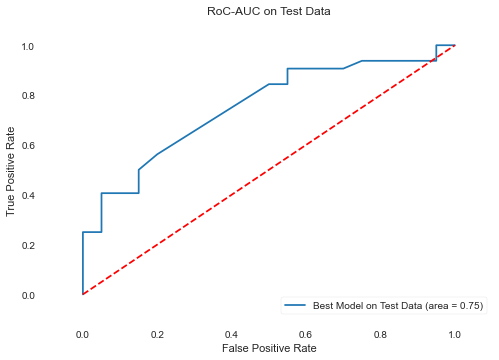

--------------------------------------------------------------------------

 Naive Bayes Classifier
Wall time: 2.93 ms

 Confusion Matrix


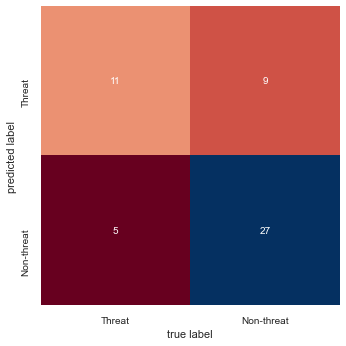


 Classification Report 

              precision    recall  f1-score   support

           0       0.69      0.55      0.61        20
           1       0.75      0.84      0.79        32

    accuracy                           0.73        52
   macro avg       0.72      0.70      0.70        52
weighted avg       0.73      0.73      0.72        52

Overall Accuracy :  73.08
Precision Score :  75.0
Recall Score :  84.38
AUC :  77.58 



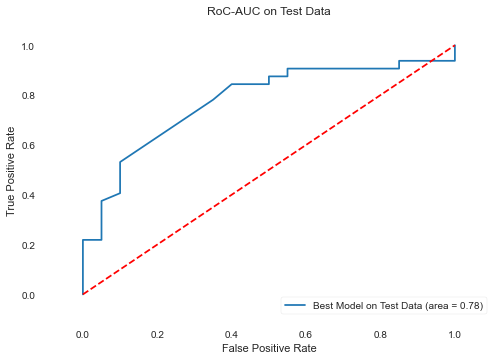

--------------------------------------------------------------------------
Wall time: 2.28 s


In [45]:
print('Models on Term Frequency - Bag of Words data')
%time model_dvt(df_tf_m)